In [101]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))
from mpmath import mp
#from mpmath import e

In [102]:
k = 10; r = 5; lam = 3; mu = 1;
Q = np.zeros((k+r,k+r))

Q[0][0] = -lam; Q[0][1] = lam
for i in range(1,k + r - 1):
    for j in range(k + r):
        if (i == j + 1):
            Q[i][j] = mu * min(i, k)
        elif (i == j):
            Q[i][j] = -lam - mu * min(k,i)
        elif (i == j - 1):
            Q[i][j] = lam
            
Q[k + r -1][k+r-2] = mu *k;  Q[k + r -1][k+r-1] = -mu *k;
Q0 = np.copy(Q)

In [103]:
print(Q)

[[ -3.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  1.  -4.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   2.  -5.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   3.  -6.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   4.  -7.   3.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   5.  -8.   3.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   6.  -9.   3.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   7. -10.   3.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   8. -11.   3.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   9. -12.   3.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  10. -13.   3.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10. -13.   3.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0

In [104]:
P = np.zeros((k + r, k + r))
for i in range(k + r):
    for j in range(k + r):
        if (i == j + 1):
            P[i][j] = -Q[i][j]/Q[i][i]
        elif (i == j - 1):
            P[i][j] = -Q[i][j]/Q[i][i]


In [105]:
state = 0; time = 0; clients = [0]; times = [0]
for it in range(100):
    deltat = stat.expon(scale = 1 / (lam + mu * min(k, state))).rvs(size = 1)[0]
    time += deltat;
    if (state == 0):
        state = 1
    else:
        toss = stat.bernoulli(P[state][state-1]).rvs(1)[0]
        if (toss == 1):
            state -= 1
        else:
            state += 1
    clients.append(state);
    times.append(time);
    
    

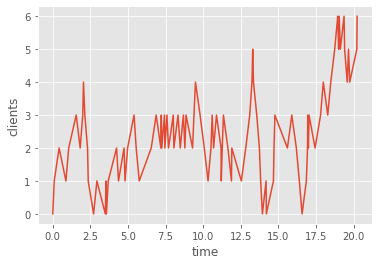

In [106]:
plt.plot(times, clients);
plt.xlabel('time')
plt.ylabel('clients')
plt.show()

In [107]:
np.linalg.eig(Q.T)[0][6]
p = np.linalg.eig(Q.T)[1][:, 6]
p = -p
p /= np.linalg.norm(p, ord = 1)
print(p)

[4.97844767e-02 1.49353430e-01 2.24030145e-01 2.24030145e-01
 1.68022609e-01 1.00813565e-01 5.04067826e-02 2.16029068e-02
 8.10109007e-03 2.70036336e-03 8.10109007e-04 2.43032702e-04
 7.29098106e-05 2.18729432e-05 6.56188295e-06]


# Task 2

### 1

In [108]:
states = np.zeros((k+r))
for n in range(100):
    state = 0; time = 0; clients = [0]; times = [0]
    states[0] += 1
    for it in range(100):
        deltat = stat.expon(scale = 1/(lam + mu * min(k, state))).rvs(size = 1)[0]
        time += deltat;
        if (state == 0):
            state = 1
        else:
            toss = stat.bernoulli(P[state][state-1]).rvs(1)[0]
            if (toss == 1):
                state -= 1
            else:
                state += 1
        states[state] += 1
        clients.append(state);
        times.append(time);

In [109]:
print('Средняя доля в каждом состоянии', states * 0.01 / 101)

Средняя доля в каждом состоянии [0.04039604 0.12544554 0.20356436 0.21752475 0.18663366 0.12148515
 0.06178218 0.02633663 0.01118812 0.00425743 0.00138614 0.
 0.         0.         0.        ]


Выше результаты для вложенной ЦМ, доля ВрЕмЕнИ -- в задачии 4

### 2

Теоретическое рапсределение $X_{30}$

In [110]:
st = np.zeros((15,)); st[0] = 1;
theor = np.array(st).T @ np.linalg.matrix_power(P, 30)

In [111]:
states = np.zeros((k+r))
for n in range(1000):
    state = 0; time = 0; clients = [0]; times = [0]
    #states[0] += 1
    for it in range(30):
        #time += deltat;
        if (state == 0):
            state = 1
        else:
            toss = stat.bernoulli(P[state][state-1]).rvs(1)[0]
            if (toss == 1):
                state -= 1
            else:
                state += 1
    states[state] += 1
        #clients.append(state);
        #times.append(time);
        

In [112]:
states/1000

array([0.06 , 0.   , 0.383, 0.   , 0.388, 0.   , 0.142, 0.   , 0.02 ,
       0.   , 0.007, 0.   , 0.   , 0.   , 0.   ])

In [113]:
print(theor)

[5.05464027e-02 0.00000000e+00 3.77158476e-01 0.00000000e+00
 3.91998205e-01 0.00000000e+00 1.48506253e-01 0.00000000e+00
 2.83178914e-02 0.00000000e+00 3.19041911e-03 0.00000000e+00
 2.65426451e-04 0.00000000e+00 1.69269374e-05]


### 3

In [114]:
k = 10; r = 5; lam = 300; mu = 1;
Q = np.zeros((k+r,k+r))

Q[0][0] = -lam; Q[0][1] = lam
for i in range(1,k + r - 1):
    for j in range(k + r):
        if (i == j + 1):
            Q[i][j] = mu * min(i, k)
        elif (i == j):
            Q[i][j] = -lam - mu * min(k,i)
        elif (i == j - 1):
            Q[i][j] = lam
            
Q[k + r -1][k+r-2] = mu *k;  Q[k + r -1][k+r-1] = -mu *k;


In [115]:
P = np.zeros((k+r,k+r))
for i in range(k+r):
    for j in range(k+r):
        if (i == j + 1):
            P[i][j] = -Q[i][j]/Q[i][i]
        elif (i == j - 1):
            P[i][j] = -Q[i][j]/Q[i][i]

In [116]:
state = 0; time = 0; clients = [0]; times = [0]
for it in range(100):
    deltat = stat.expon(scale = 1/(lam + mu * min(k, state))).rvs(size = 1)[0]
    time += deltat;
    if (state == 0):
        state = 1
    else:
        toss = stat.bernoulli(P[state][state-1]).rvs(1)[0]
        if (toss == 1):
            state -= 1
        else:
            state += 1
    clients.append(state);
    times.append(time);

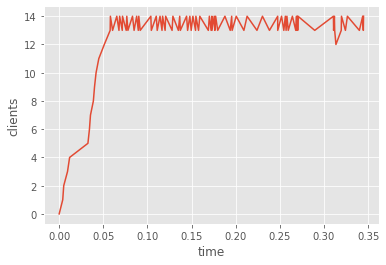

In [117]:
plt.plot(times, clients);
plt.xlabel('time')
plt.ylabel('clients')
plt.show()

### 4

Вернемся к исходной Q

In [118]:
Q = Q0; k = 10; r = 5; lam = 3; mu = 1;
P = np.zeros((k+r,k+r))
for i in range(k+r):
    for j in range(k+r):
        if (i == j + 1):
            P[i][j] = -Q[i][j]/Q[i][i]
        elif (i == j - 1):
            P[i][j] = -Q[i][j]/Q[i][i]

In [128]:
state = 0; time = 0; clients = [0]; times = [0]; timeinstate = np.zeros((15,));
P_est = np.zeros((k + r, k + r))
for it in range(10000):
    deltat = stat.expon(scale = 1 / (lam + mu * min(k, state))).rvs(size = 1)[0]
    timeinstate[state] += deltat;
    old_state = state;
    
    if (state == 0):
        state = 1
    else:
        toss = stat.bernoulli(P[state][state - 1]).rvs(1)[0]
        if (toss == 1):
            state -= 1
        else:
            state += 1
    clients.append(state);
    #times.append(time);
    P_est[old_state][state] += 1

In [127]:
q_i = []
for i in range(k + r):
    if (clients.count(i) == 0):
        q_i.append(0);
    else:
        q_i.append(clients.count(i) / timeinstate[i])
q_i

[3.150279260817551,
 4.004711177990848,
 4.893155339301844,
 6.037075425179149,
 7.144011331063174,
 7.637638997498887,
 8.976466058605725,
 9.379958586373558,
 10.568079982756313,
 11.987405074473912,
 13.462046439820913,
 17.397641334895226,
 14.158394148401651,
 0,
 0]

In [141]:
new_stuff = []
for i in range(k + r):
    if (clients.count(i) == 0):
        new_stuff.append(0);
    else:
        new_stuff.append(timeinstate[i] / clients.count(i))
new_stuff

[0.28138022958969244,
 0.24356847511406673,
 0.197579387541592,
 0.16507765546430603,
 0.14956363079593094,
 0.12439730755927883,
 0.10201728311988091,
 0.0930880779425583,
 0.09132118954238733,
 0.07342947823448148,
 0.10358988634648618,
 0.13867302173711782,
 0.12074762005889278,
 0,
 0]

In [139]:
for i in range(k+r):
    P_est[i] = P_est[i] / np.linalg.norm(P_est[i], ord = 1)
P_est

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.25596529, 0.        , 0.74403471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.3898691 , 0.        , 0.6101309 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.49150987, 0.        , 0.50849013,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.55156951, 0.        ,
        0.44843049, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [140]:
Q_est = np.zeros((k+r,k+r))

Q_est[0][0] = -q_i[0]; Q_est[0][1] = q_i[0]
for i in range(1,k + r - 2):
    for j in range(k + r):
        if (i == j + 1):
            Q_est[i][j] = q_i[i] * P_est[i][j]
        elif (i == j):
            Q_est[i][j] = -q_i[i]
        elif (i == j - 1):
            Q_est[i][j]  = q_i[i] * P_est[i][j]
            
Q_est[k + r -1][k+r-2] = q_i[k+r-1];  Q_est[k + r -1][k+r-1] = -q_i[k+r-1];
Q_est

array([[ -3.15027926,   3.15027926,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  1.02506707,  -4.00471118,   2.97964411,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   1.90769004,  -4.89315534,   2.9854653 ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.96728214,  -6.03707543,
          3.06979329,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.  